# Breakdown of Average Citations per Paper (group by Subject Area)
# PDF of Average Citations per Paper (group by Subject Area)

Read merged (all years) CSV file into data frame:

In [1]:
import csv
import pandas as pd
from ast import literal_eval

df_logan = pd.read_csv(r'/Users/loganhornbuckle/Desktop/Logan/Merged/all_years_merged_logan_mouna_darpan.csv',
                       encoding='cp1252' ,dtype='str', error_bad_lines=False)

# get dimmensions of dataframe to ensure csv imported correctly
df_logan.shape

(85082, 12)

View DataFrame:

In [2]:
df_logan

,eid,cite,Lang,Para,Title,year,publication_name,publication_type,Author Keyword,Abbreviation,Code,Text
0,2-s2.0-38049161948,2,eng,Prion proteins (PrPs) are infectious pathogens...,Comparative bioinformatics analysis of prion p...,2007,Experimental and Molecular Medicine,Journal,"['Computational biology', 'Neurodegenerative d...",BIOC,1303,Biochemistry
1,2-s2.0-36749042030,17,eng,"CCAP, the largest European protistan culture c...",The Culture Collection of Algae and Protozoa (...,2007,Gene,Journal,"['Biodiversity', 'Biological resource centre',...",BIOC,1311,Genetics
2,2-s2.0-84858487958,0,eng,It is increasingly difficult for teaching to k...,Developing a multidisciplinary online cyberinf...,2007,"ASEE Annual Conference and Exposition, Confere...",Conference Proceeding,NaN,BIOC,1311,Genetics
3,2-s2.0-84858511527,0,eng,This paper provides an overview of design and ...,Integration of bioinformatics in science curri...,2007,"ASEE Annual Conference and Exposition, Confere...",Conference Proceeding,NaN,ENGI,2200,Engineering (all)
4,2-s2.0-84858503835,0,eng,Rapid advances in scientific engineering and c...,A project-centric approach for cyberinfrastruc...,2007,"ASEE Annual Conference and Exposition, Confere...",Conference Proceeding,NaN,ENGI,2200,Engineering (all)
5,2-s2.0-37349108551,3,eng,"In DNA microarray experiments, the gene fragme...",Optimal clone identifier for genomic shotgun l...,2007,Genetics and Molecular Research,Journal,"['Bioinformatics tool', 'Comparative genomic h...",ENGI,2200,Engineering (all)
6,2-s2.0-37349041400,7,eng,The rate at which knowledge about genomic sequ...,Ab initio 3-D structure prediction of an artif...,2007,Genetics and Molecular Research,Journal,"['Ab initio prediction', 'Molecular dynamics s...",BIOC,1311,Genetics
7,2-s2.0-37349014523,3,eng,Flagella are constructed and maintained throug...,Intraflagellar transport complex in Leishmania...,2007,Genetics and Molecular Research,Journal,"['Bioinformatics', 'Flagellar motility', 'Geno...",BIOC,1311,Genetics
8,2-s2.0-84858512072,0,eng,Tremendous advances are being made in pharmace...,Collaborative efforts facilitate the growth of...,2007,"ASEE Annual Conference and Exposition, Confere...",Conference Proceeding,NaN,BIOC,1311,Genetics
9,2-s2.0-37349065612,6,eng,This paper describes a Ventricular Tachycardia...,Ventricular tachycardia/fibrillation detection...,2007,Lecture Notes in Computer Science (including s...,Book Series,"['ECG signal processing', 'Heart monitoring', ...",ENGI,2200,Engineering (all)


Delete unnecessary columns not used in statistical analysis:

In [3]:
del df_logan['Author Keyword']
del df_logan['eid']
del df_logan['Lang']
del df_logan['Para']
del df_logan['Title']
del df_logan['year']
del df_logan['publication_name']
del df_logan['Code']
del df_logan['publication_type']

Sum the total number of citations and papers, grouped by subject area.
This gives us the total citations and papers for each subject area:

In [5]:
df_logan['cite'] = pd.to_numeric(df_logan['cite'])
df_count = df_logan.groupby('Abbreviation').sum()
df_count['Num_Abbrev'] = df_logan['Abbreviation'].value_counts()

Divide the number of citations by the number of papers to give us average number of citations per paper (gropued by subject area:

In [ ]:
df_count['Result'] = df_count['cite']/df_count['Num_Abbrev']
df_stat = df_count.sort_values(by = 'Result', ascending=False)

Reset index:

In [6]:
df_stat.reset_index()

,Abbreviation,cite,Num_Abbrev,Result
0,ARTS,3039,55,55.254545
1,NURS,2671,81,32.975309
2,BUSI,4636,171,27.111111
3,EART,1226,58,21.137931
4,MATH,142963,7168,19.944615
5,AGRI,61133,3363,18.178115
6,COMP,265377,15458,17.167615
7,CENG,21740,1366,15.915081
8,ENGI,111539,7254,15.376206
9,BIOC,396226,25956,15.265295


After calculations made, delete unnecessary columns 'Num_Abbrev' and 'cite':

In [7]:
del df_stat['Num_Abbrev']
del df_stat['cite']

Create & view bar plot for data comparison:

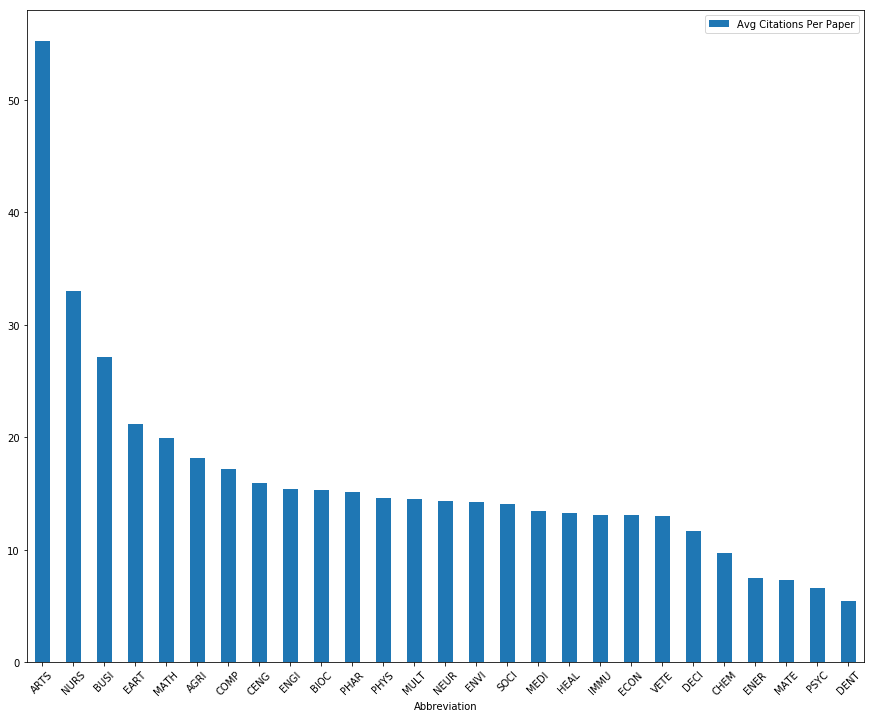

In [9]:
ax = df_stat.plot.bar(rot=45 , figsize=(15,12))
ax.legend(["Avg Citations Per Paper"]);

Create & view prob dist plot for same data:

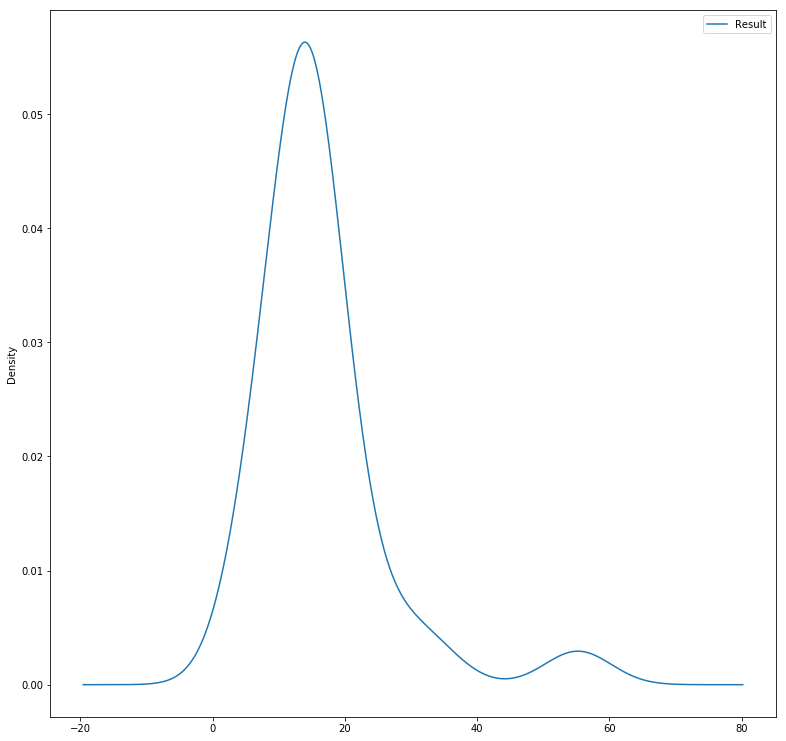

In [19]:
ax = df_stat.plot.kde(figsize=(13,13))